In [1]:
#Kaleb Kendall, November 2023

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_preprocessing as ks


In [3]:
data = pd.read_csv("/data/workspace_files/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0.5, 1.0, 'California Housing')

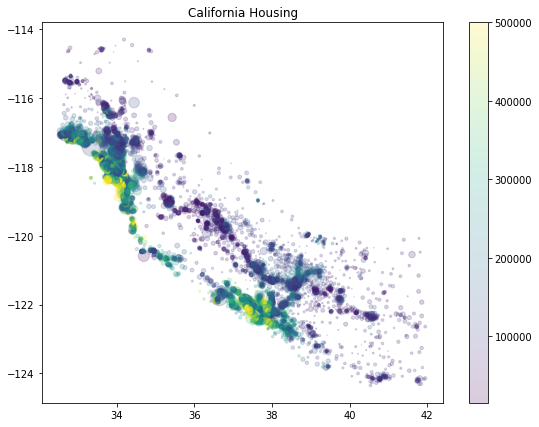

In [37]:
plt.figure( figsize= (9,7))
plt.scatter(data.latitude, data.longitude, alpha = 0.2, c = data.median_house_value, s = data.population/100)
plt.colorbar()
plt.title("California Housing")
plt.legend()

In [ ]:
from lets_plot import * 
ggplot() + \
geom_line(aes(x="", y=""), data=, sampling="none" if .size < 2500 else sampling_systematic(n=2500)) + \
ggtitle("Chart") 

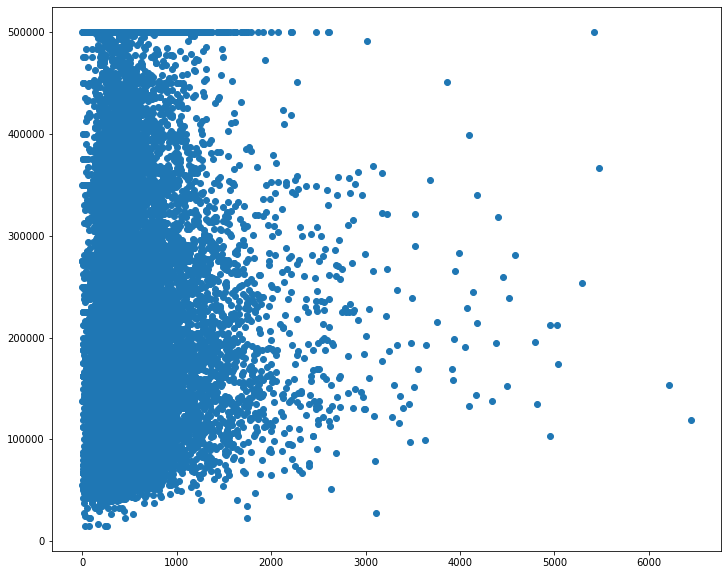

In [5]:
plt.figure(figsize=(12,10))
plt.scatter(data.total_bedrooms, data.median_house_value)

<Axes: >

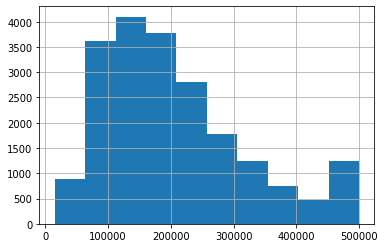

In [6]:
data.median_house_value.hist()

In [8]:
#Drops missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis = 1 )
y = data['median_house_value']

In [10]:
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [11]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19917,-119.31,36.30,20.0,1256.0,209.0,566.0,195.0,4.0221,INLAND,86300.0
13875,-117.30,34.46,8.0,6246.0,1273.0,3883.0,1264.0,2.7917,INLAND,98200.0
17823,-121.86,37.38,15.0,2052.0,405.0,1380.0,409.0,5.8686,<1H OCEAN,181100.0
2569,-124.14,40.78,35.0,2426.0,423.0,982.0,432.0,3.4219,NEAR OCEAN,92800.0
1122,-121.57,39.76,20.0,1384.0,257.0,557.0,232.0,2.0882,INLAND,104900.0
...,...,...,...,...,...,...,...,...,...,...
9546,-120.71,37.38,14.0,1979.0,432.0,1756.0,382.0,2.6923,INLAND,71400.0
11824,-120.99,39.04,17.0,2289.0,450.0,1182.0,397.0,2.3696,INLAND,166800.0
16882,-122.38,37.59,31.0,3052.0,844.0,1581.0,788.0,3.0744,NEAR OCEAN,457700.0
11455,-118.01,33.66,19.0,4559.0,1045.0,1949.0,910.0,4.3550,NEAR OCEAN,429200.0


array([[%lt;Axes: title={'center': 'longitude'}%gt;,
 %lt;Axes: title={'center': 'latitude'}%gt;,
 %lt;Axes: title={'center': 'housing_median_age'}%gt;],
 [%lt;Axes: title={'center': 'total_rooms'}%gt;,
 %lt;Axes: title={'center': 'total_bedrooms'}%gt;,
 %lt;Axes: title={'center': 'population'}%gt;],
 [%lt;Axes: title={'center': 'households'}%gt;,
 %lt;Axes: title={'center': 'median_income'}%gt;,
 %lt;Axes: title={'center': 'median_house_value'}%gt;]], dtype=object)

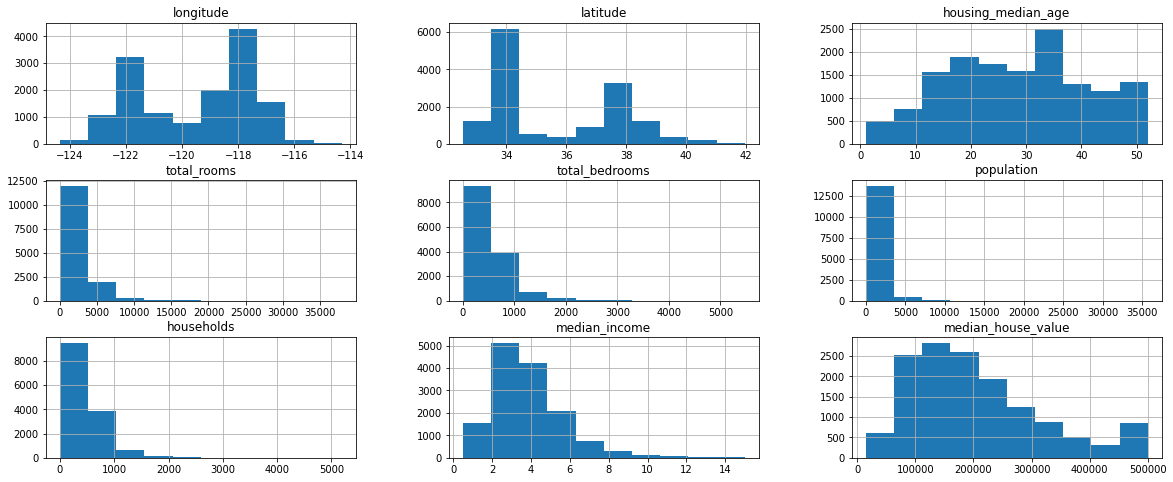

In [12]:
train_data.hist(figsize=(20, 8))


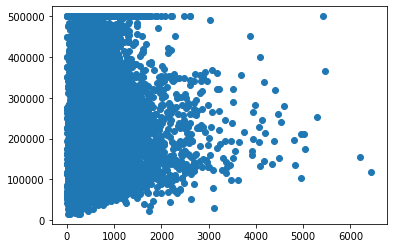

In [13]:
plt.scatter(data['total_bedrooms'], data['median_house_value'])

<ipython-input-14-f67b701522c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =  True, cmap="YlGnBu")


<Axes: >

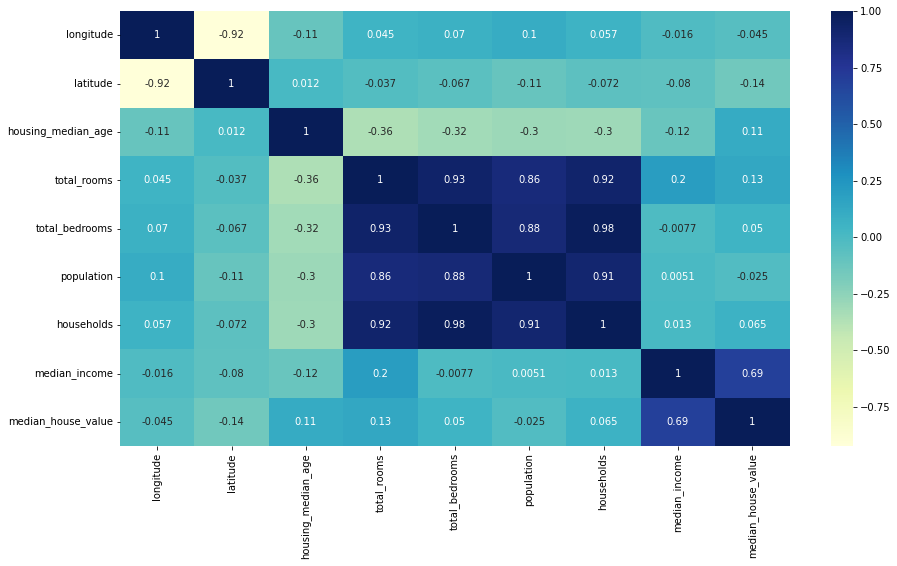

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot =  True, cmap="YlGnBu")

In [15]:
train_data['total_rooms']  = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms']  = np.log(train_data['total_bedrooms']+ 1)
train_data['population']  = np.log(train_data['population']+ 1)
train_data['households']  = np.log(train_data['households']+ 1)

array([[%lt;Axes: title={'center': 'longitude'}%gt;,
 %lt;Axes: title={'center': 'latitude'}%gt;,
 %lt;Axes: title={'center': 'housing_median_age'}%gt;],
 [%lt;Axes: title={'center': 'total_rooms'}%gt;,
 %lt;Axes: title={'center': 'total_bedrooms'}%gt;,
 %lt;Axes: title={'center': 'population'}%gt;],
 [%lt;Axes: title={'center': 'households'}%gt;,
 %lt;Axes: title={'center': 'median_income'}%gt;,
 %lt;Axes: title={'center': 'median_house_value'}%gt;]], dtype=object)

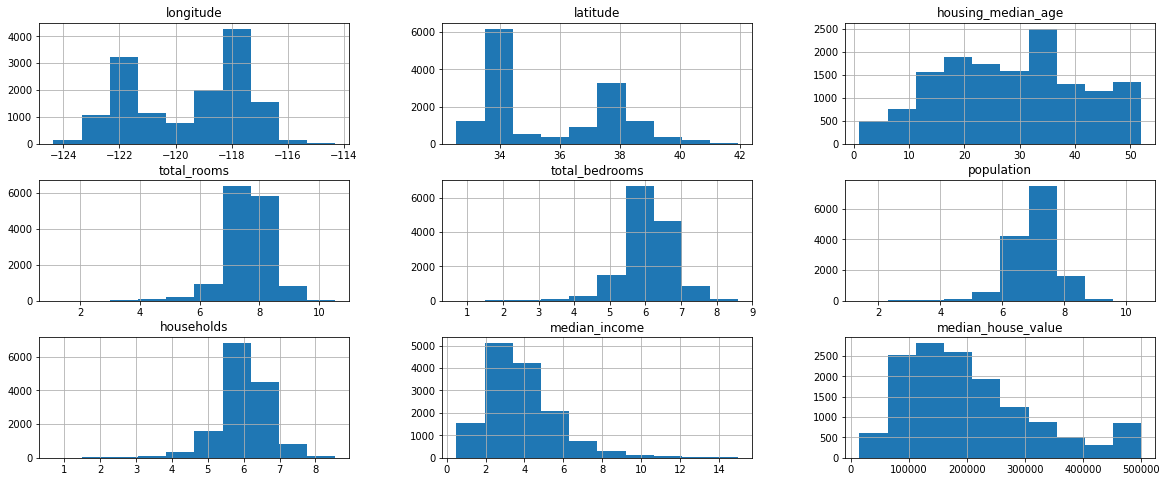

In [16]:
train_data.hist(figsize = (20, 8))

In [17]:
xyz = pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.drop("ocean_proximity", axis = "columns")

In [18]:
train_data = train_data.join(xyz)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19917,-119.31,36.30,20.0,7.136483,5.347108,6.340359,5.278115,4.0221,86300.0,0,1,0,0,0
13875,-117.30,34.46,8.0,8.739857,7.149917,8.264621,7.142827,2.7917,98200.0,0,1,0,0,0
17823,-121.86,37.38,15.0,7.627057,6.006353,7.230563,6.016157,5.8686,181100.0,1,0,0,0,0
2569,-124.14,40.78,35.0,7.794411,6.049733,6.890609,6.070738,3.4219,92800.0,0,0,0,0,1
1122,-121.57,39.76,20.0,7.233455,5.552960,6.324359,5.451038,2.0882,104900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-120.71,37.38,14.0,7.590852,6.070738,7.471363,5.948035,2.6923,71400.0,0,1,0,0,0
11824,-120.99,39.04,17.0,7.736307,6.111467,7.075809,5.986452,2.3696,166800.0,0,1,0,0,0
16882,-122.38,37.59,31.0,8.023880,6.739337,7.366445,6.670766,3.0744,457700.0,0,0,0,0,1
11455,-118.01,33.66,19.0,8.425078,6.952729,7.575585,6.814543,4.3550,429200.0,0,0,0,0,1


<Axes: >

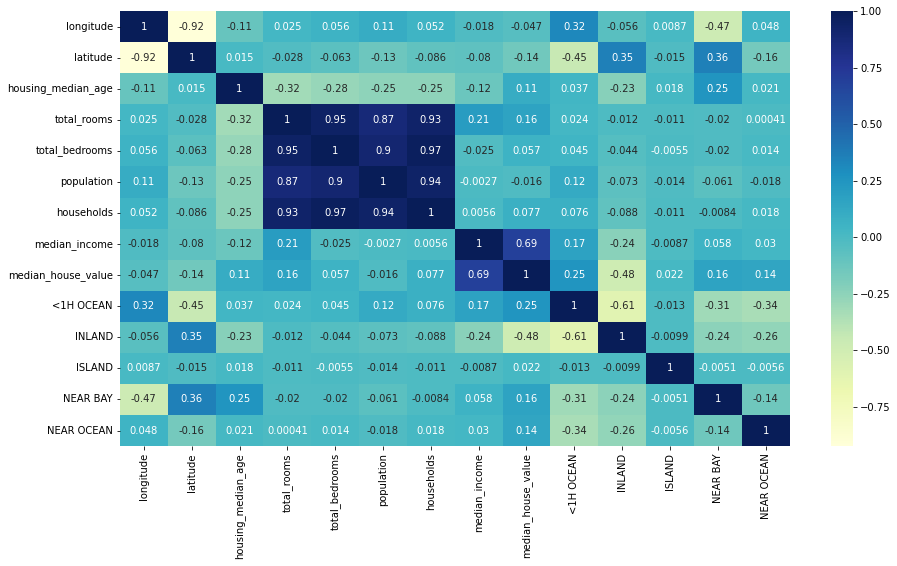

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot =  True, cmap="YlGnBu")

In [21]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(['median_house_value'], axis = 1) , train_data['median_house_value']
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [22]:
y_train

19917 86300.0
13875 98200.0
17823 181100.0
2569 92800.0
1122 104900.0
 ... 
9546 71400.0
11824 166800.0
16882 457700.0
11455 429200.0
9548 113900.0
Name: median_house_value, Length: 14303, dtype: float64

In [23]:
test_data = x_test.join(y_test)

test_data['total_rooms']  = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms']  = np.log(test_data['total_bedrooms']+ 1)
test_data['population']  = np.log(test_data['population']+ 1)
test_data['households']  = np.log(test_data['households']+ 1)


In [24]:
abc = pd.get_dummies(test_data.ocean_proximity)
test_data = test_data.drop("ocean_proximity", axis = "columns")
test_data = test_data.join(abc)

In [25]:
X_test , y_test = test_data.drop(['median_house_value'], axis = 1) , test_data['median_house_value']

In [26]:
reg.score(X_train, y_train)

0.6726131631952412

In [27]:

reg.score(X_test,y_test)

0.6646185361534029

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestRegressor RandomForestRegressor()

In [29]:
forest.score(X_test,y_test)

0.8209807332133952

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators" : [250,300,325],
    "max_depth":[None,4,8]

    }

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
 param_grid={'max_depth': [None, 4, 8],
 'n_estimators': [250, 300, 325]},
 return_train_score=True, scoring='neg_mean_squared_error') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=5, estimator=RandomForestRegressor(),
 param_grid={'max_depth': [None, 4, 8],
 'n_estimators': [250, 300, 325]},
 return_train_score=True, scoring='neg_mean_squared_error') estimator: RandomForestRegressor RandomForestRegressor() RandomForestRegressor RandomForestRegressor()

In [31]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestRegressor RandomForestRegressor(n_estimators=300)

In [32]:
grid_search.best_estimator_.score(X_test, y_test)

0.8228196630654392

In [33]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error 

gradientBoost = GradientBoostingRegressor(n_estimators = 225).fit(X_train, y_train)
mean_absolute_error(gradientBoost.predict(X_train),y_train)


32519.47612134158

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
#Cluster Model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
clust = data.loc[:,["median_income", "latitude", "longitude"]]
clust["Cluster"] = kmeans.fit_predict(clust)
clust["Cluster"] = clust["Cluster"].astype("category")

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


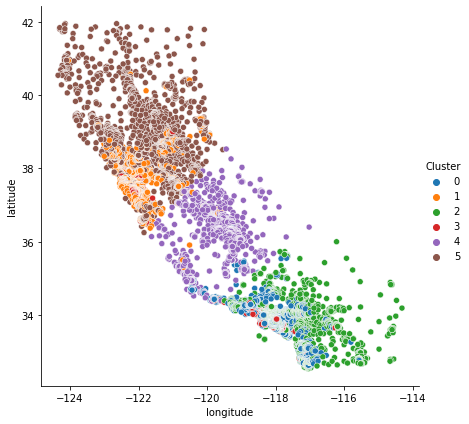

In [39]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=clust, height=6,
        )